In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
def model_plot(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.legend()
  plt.show()

In [ ]:
#Plot graph for Prev_Close
def plot_prediction(model, train, test, y_test):
  prediction = model.predict(test)
  train = scaler.inverse_transform(train)
  prediction = scaler.inverse_transform(prediction)
  y_test = scaler.inverse_transform(y_test)
  plt.figure(figsize=(15,10))
  plt.plot(np.arange(train.shape[0]), train[:,0], label='Training')
  plt.plot(train.shape[0] + np.arange(y_test.shape[0]), y_test[:,0], label='Test_Real')
  plt.plot(train.shape[0] + np.arange(prediction.shape[0]), prediction[:,0], label='Test_Pred')
  plt.legend()
  plt.show()

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/infy_stock.csv')

In [ ]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2015-01-01,INFY,EQ,1972.55,1968.95,1982.00,1956.9,1971.00,1974.40,1971.34,500691,9.870306e+13,14908,258080,0.5154
1,2015-01-02,INFY,EQ,1974.40,1972.00,2019.05,1972.0,2017.95,2013.20,2003.25,1694580,3.394669e+14,54166,1249104,0.7371
2,2015-01-05,INFY,EQ,2013.20,2009.90,2030.00,1977.5,1996.00,1995.90,2004.59,2484256,4.979911e+14,82694,1830962,0.7370
3,2015-01-06,INFY,EQ,1995.90,1980.00,1985.00,1934.1,1965.10,1954.20,1954.82,2416829,4.724458e+14,108209,1772070,0.7332
4,2015-01-07,INFY,EQ,1954.20,1965.00,1974.75,1950.0,1966.05,1963.55,1962.59,1812479,3.557162e+14,62463,1317720,0.7270


In [ ]:
df.tail()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
243,2015-12-24,INFY,EQ,1100.85,1102.05,1104.45,1090.1,1095.8,1096.35,1095.84,615027,6.739696e+13,20528,294731,0.4792
244,2015-12-28,INFY,EQ,1096.35,1090.00,1110.00,1090.0,1103.8,1104.75,1105.51,2763476,3.055046e+14,51103,1880078,0.6803
245,2015-12-29,INFY,EQ,1104.75,1101.25,1110.00,1097.3,1103.0,1104.70,1104.14,1672531,1.846706e+14,52409,967577,0.5785
246,2015-12-30,INFY,EQ,1104.70,1101.10,1106.60,1083.0,1088.0,1086.30,1094.45,2576985,2.820380e+14,65379,1754378,0.6808
247,2015-12-31,INFY,EQ,1086.30,1090.15,1109.95,1087.0,1107.0,1105.40,1102.09,3971969,4.377467e+14,75143,2641827,0.6651


In [ ]:
features = ['Prev Close',	'Open',	'High',	'Low',	'Last',	'Close',	'VWAP',	'Volume',	'Turnover',	'Trades',	'Deliverable Volume',	'%Deliverble']
dataset = df[features]
print(dataset.shape)

(248, 12)


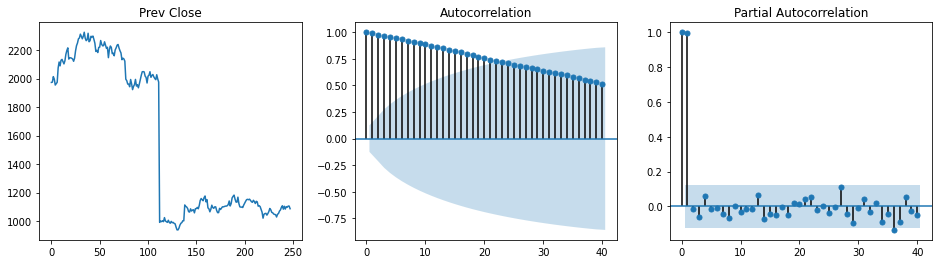

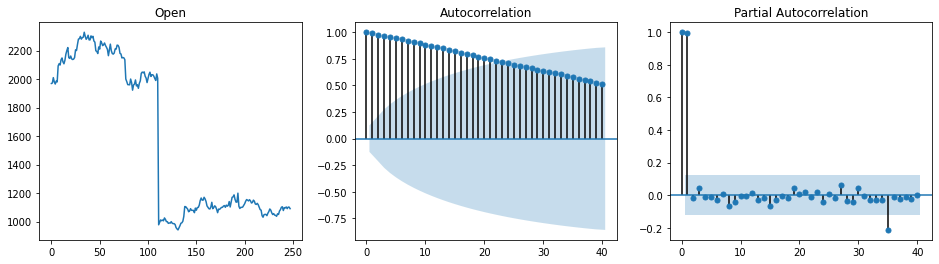

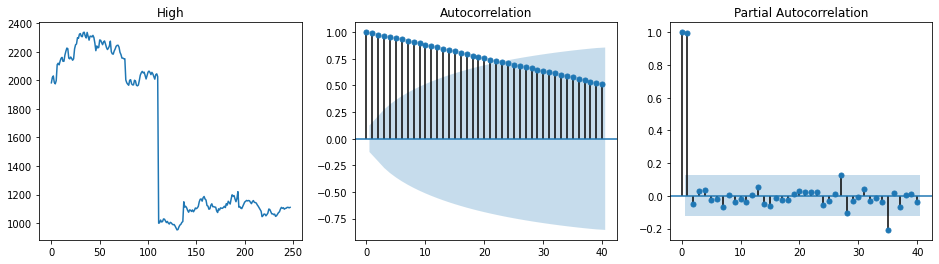

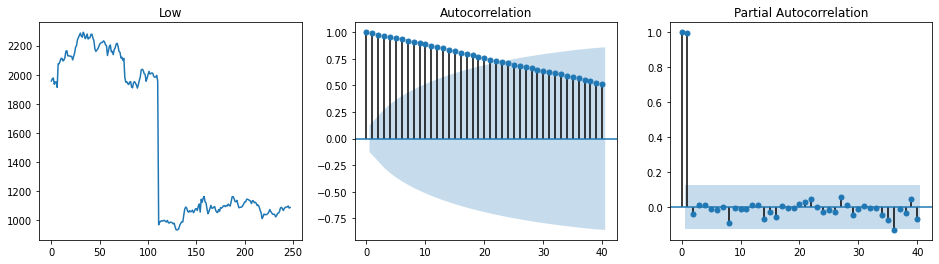

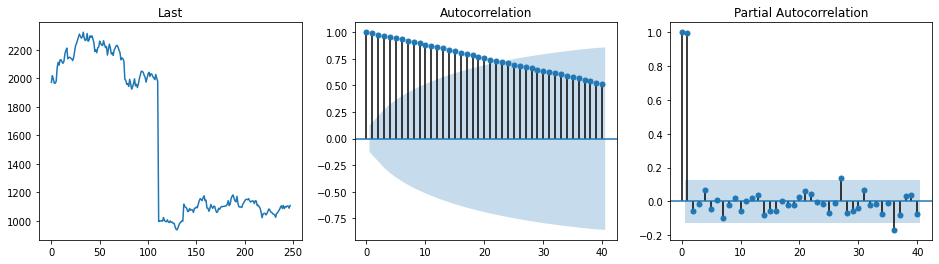

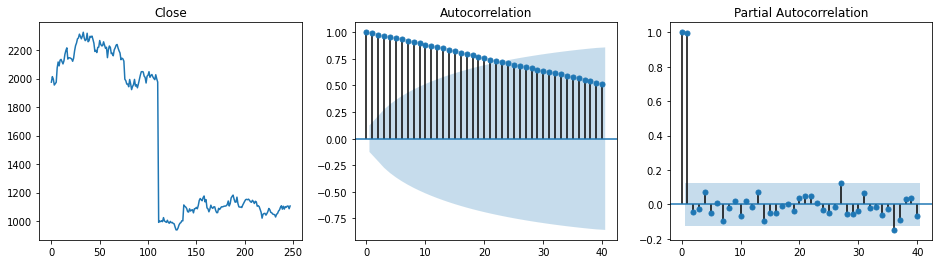

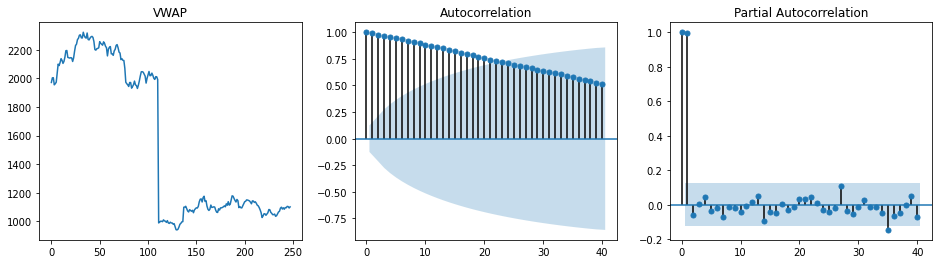

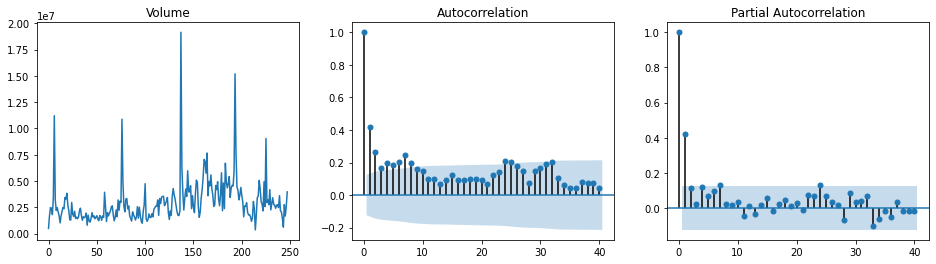

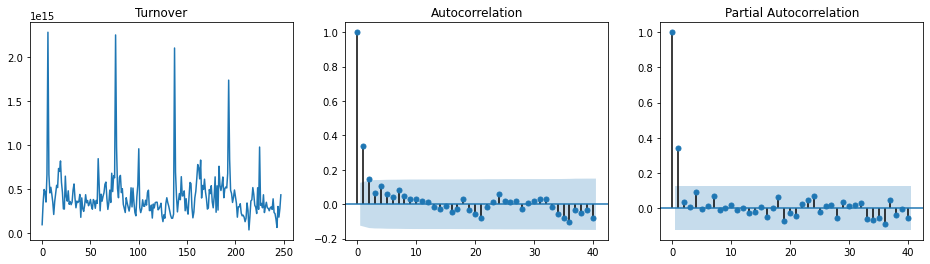

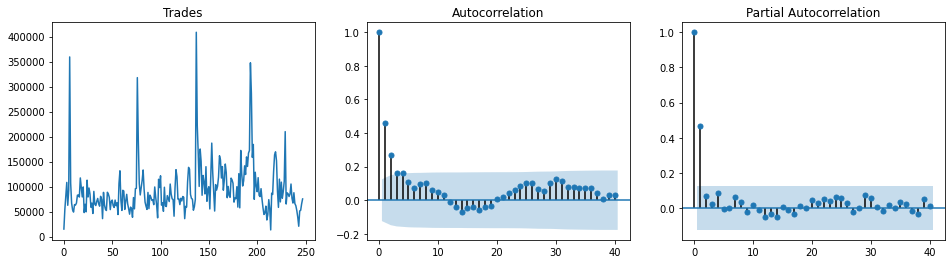

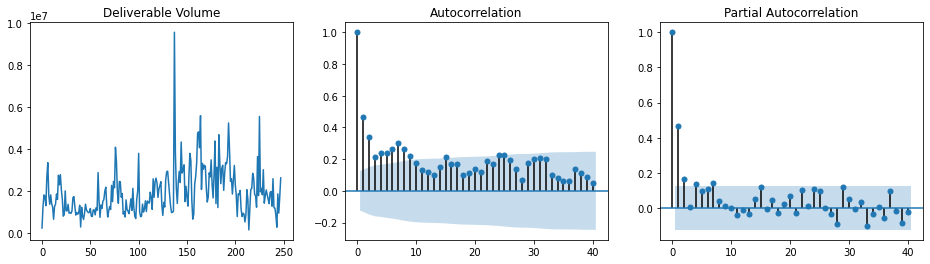

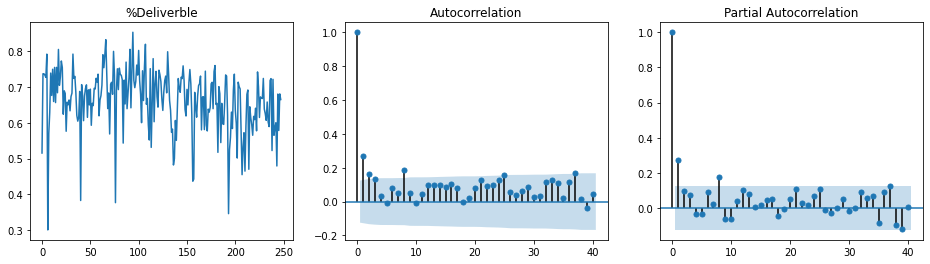

In [ ]:
for feature in features:
  fig, axes = plt.subplots(1, 3, figsize=(16,4))
  axes[0].plot(df[feature])
  axes[0].set_title(feature)
  plot_acf(dataset[feature], lags=40, ax=axes[1])
  plot_pacf(dataset[feature], lags=40, ax=axes[2])
  plt.show()

# Train/Test split and Normalization 

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(np.array(dataset))
dataset.shape

(248, 12)

In [ ]:
split = int(0.75 * dataset.shape[0])
train = dataset[:split,:]
test = dataset[split:,:]
print(str(train.shape) + '\n' + str(test.shape))

(186, 12)
(62, 12)


In [ ]:
train[:10]

array([[0.74614331, 0.74086486, 0.74420117, 0.75345741, 0.74619875,
        0.74747693, 0.74595761, 0.00782064, 0.026475  , 0.00432993,
        0.00976198, 0.38892909],
       [0.74747693, 0.74306306, 0.77097334, 0.76456525, 0.78003171,
        0.77544694, 0.76906422, 0.07132063, 0.13366196, 0.10362   ,
        0.1150806 , 0.78997829],
       [0.77544694, 0.77037838, 0.77888576, 0.76861115, 0.76421417,
        0.76297578, 0.77003454, 0.11332154, 0.20423624, 0.17577209,
        0.17691612, 0.7897974 ],
       [0.76297578, 0.74882883, 0.74636896, 0.7366853 , 0.74194711,
        0.73291522, 0.73399518, 0.10973526, 0.19286361, 0.2403038 ,
        0.17065752, 0.7829233 ],
       [0.73291522, 0.73801802, 0.73896235, 0.74838164, 0.74263169,
        0.73965542, 0.73962158, 0.07759139, 0.14089609, 0.1246045 ,
        0.1223726 , 0.77170767],
       [0.73965542, 0.75286486, 0.7550401 , 0.74838164, 0.75214384,
        0.7467921 , 0.74700034, 0.16156123, 0.28037578, 0.20121046,
        0.26778444,

In [ ]:
def create_dataset(dataset, time_step=1):
  dataX, dataY = [],[]
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step),:]
    dataX.append(a)
    dataY.append(dataset[i+time_step,:])
  return np.array(dataX), np.array(dataY)

In [ ]:
time_step = 10
X_train, y_train = create_dataset(train, time_step)
X_test, y_test = create_dataset(test, time_step)

models_dict = {}
history_dict = {}

In [ ]:
print(X_train.shape)
print(y_train.shape)

(175, 10, 12)
(175, 12)


# One-layer Networks
# SimpleRNN

In [ ]:
inputs   = tf.keras.Input(shape=(10,12))
x = tf.keras.layers.SimpleRNN(128)(inputs)
outputs = tf.keras.layers.Dense(12,activation = 'linear')(x)

stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15)

model = tf.keras.Model(inputs, outputs)
print(model.summary())
model.compile(optimizer='adam', loss='mse', metrics=['mape','mae',tf.keras.metrics.RootMeanSquaredError()])
history = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=100, callbacks=[stopping])

models_dict['One_SimpleRNN'] = model
history_dict['One_SimpleRNN'] = history

Model: "model_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_31 (InputLayer)        [(None, 10, 12)]          0         
_________________________________________________________________
simple_rnn_10 (SimpleRNN)    (None, 128)               18048     
_________________________________________________________________
dense_30 (Dense)             (None, 12)                1548      
Total params: 19,596
Trainable params: 19,596
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
6/6 [==============================] - 1s 55ms/step - loss: 0.3326 - mape: 432420.4839 - mae: 0.4129 - root_mean_squared_error: 0.5664 - val_loss: 0.0748 - val_mape: 2196071.0000 - val_mae: 0.2103 - val_root_mean_squared_error: 0.2735
Epoch 2/100
6/6 [==============================] - 0s 14ms/step - loss: 0.0511 - mape: 369775.0847 - mae: 0.1696 - root_mean_squared

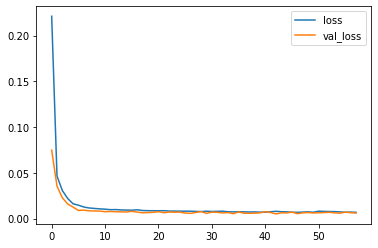

In [ ]:
model_plot(history)

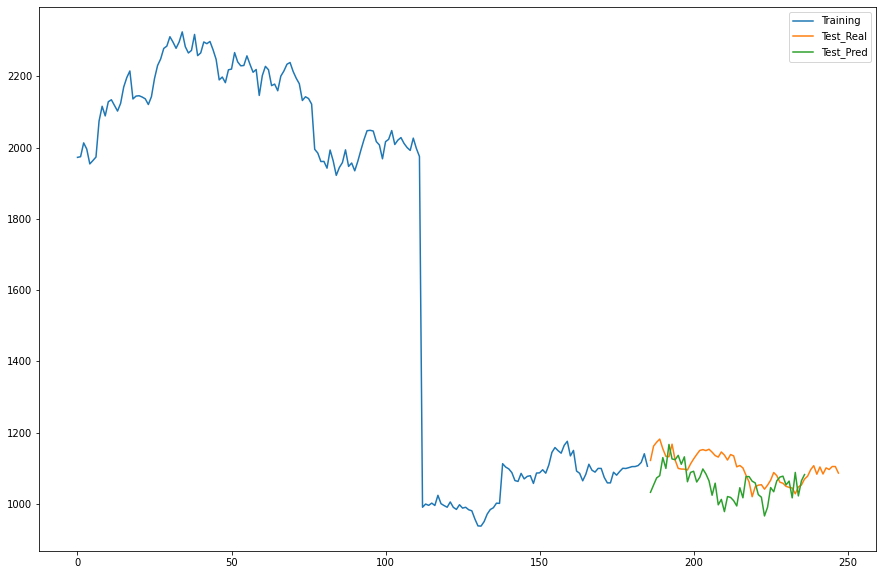

In [ ]:
plot_prediction(model, train, X_test, test)

# LSTM


In [ ]:
inputs = tf.keras.Input(shape=(10,12))
x = tf.keras.layers.LSTM(128)(inputs)
outputs = tf.keras.layers.Dense(12,activation = 'linear')(x)


model = tf.keras.Model(inputs, outputs)
print(model.summary())
model.compile(optimizer='adam', loss='mse', metrics=['mape','mae',tf.keras.metrics.RootMeanSquaredError()])
history = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=100, callbacks=[stopping])

models_dict['One_LSTM'] = model
history_dict['One_LSTM'] = history

Model: "model_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_32 (InputLayer)        [(None, 10, 12)]          0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 128)               72192     
_________________________________________________________________
dense_31 (Dense)             (None, 12)                1548      
Total params: 73,740
Trainable params: 73,740
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
6/6 [==============================] - 2s 84ms/step - loss: 0.3317 - mape: 158868.8951 - mae: 0.4266 - root_mean_squared_error: 0.5721 - val_loss: 0.0198 - val_mape: 334051.7188 - val_mae: 0.0873 - val_root_mean_squared_error: 0.1407
Epoch 2/100
6/6 [==============================] - 0s 11ms/step - loss: 0.0491 - mape: 533412.7887 - mae: 0.1719 - root_mean_squared_

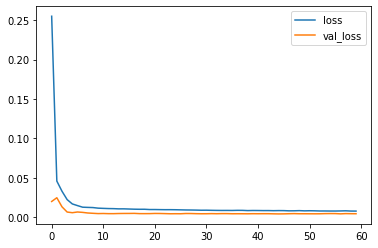

In [ ]:
model_plot(history)

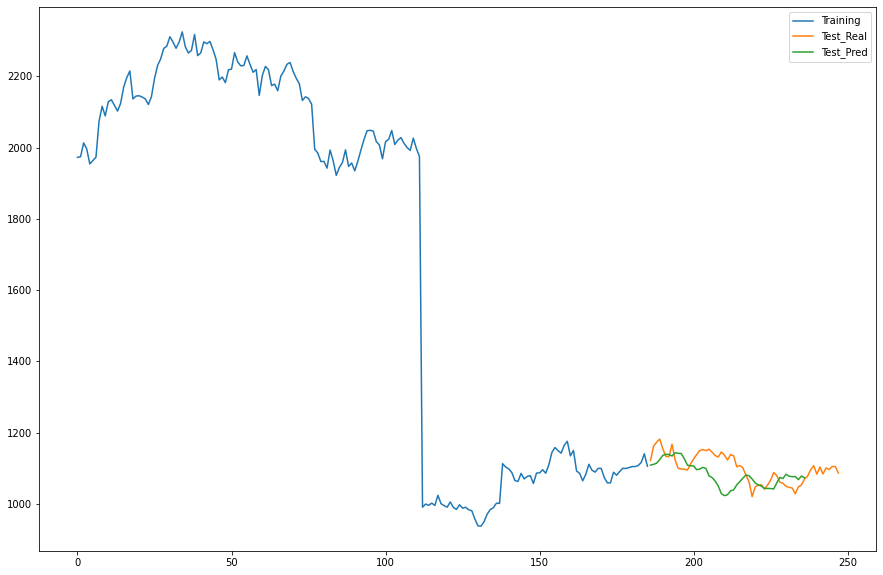

In [ ]:
plot_prediction(model, train, X_test, test)

# GRU

In [ ]:
inputs = tf.keras.Input(shape=(10,12))
x = tf.keras.layers.GRU(128)(inputs)
outputs = tf.keras.layers.Dense(12,activation = 'linear')(x)


model = tf.keras.Model(inputs, outputs)
print(model.summary())
model.compile(optimizer='adam', loss='mse', metrics=['mape','mae',tf.keras.metrics.RootMeanSquaredError()])
history = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=100, callbacks=[stopping])

models_dict['One_GRU'] = model
history_dict['One_GRU'] = history

Model: "model_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_33 (InputLayer)        [(None, 10, 12)]          0         
_________________________________________________________________
gru_22 (GRU)                 (None, 128)               54528     
_________________________________________________________________
dense_32 (Dense)             (None, 12)                1548      
Total params: 56,076
Trainable params: 56,076
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
6/6 [==============================] - 2s 79ms/step - loss: 0.2287 - mape: 303642.4621 - mae: 0.3550 - root_mean_squared_error: 0.4765 - val_loss: 0.0181 - val_mape: 328579.2500 - val_mae: 0.0975 - val_root_mean_squared_error: 0.1346
Epoch 2/100
6/6 [==============================] - 0s 10ms/step - loss: 0.0407 - mape: 525839.4062 - mae: 0.1587 - root_mean_squared_

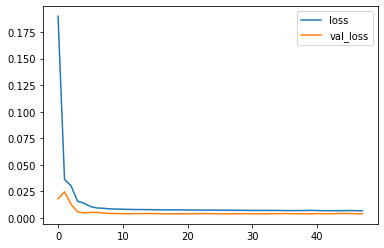

In [ ]:
model_plot(history)

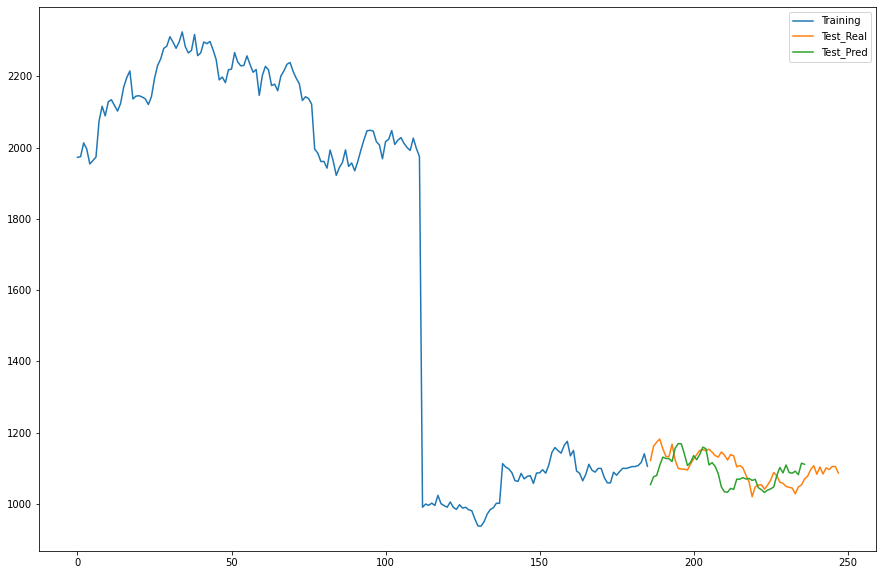

In [ ]:
plot_prediction(model, train, X_test, test)

# Convolutional 

In [ ]:
inputs = tf.keras.Input(shape=(10,12))
x = tf.keras.layers.Conv1D(128, 5)(inputs)
x = tf.keras.layers.Flatten()(x)
outputs = tf.keras.layers.Dense(12,activation = 'linear')(x)


model = tf.keras.Model(inputs, outputs)
print(model.summary())
model.compile(optimizer='adam', loss='mse', metrics=['mape','mae',tf.keras.metrics.RootMeanSquaredError()])
history = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=100, callbacks=[stopping])

models_dict['One_Convolution'] = model
history_dict['One_Convolution'] = history

Model: "model_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_34 (InputLayer)        [(None, 10, 12)]          0         
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 6, 128)            7808      
_________________________________________________________________
flatten_6 (Flatten)          (None, 768)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 12)                9228      
Total params: 17,036
Trainable params: 17,036
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
6/6 [==============================] - 1s 35ms/step - loss: 0.2804 - mape: 174364.4724 - mae: 0.3709 - root_mean_squared_error: 0.5208 - val_loss: 0.0261 - val_mape: 605181.3125 - val_mae: 0.1238 - val_root_mean_squared_error: 0.1615
E

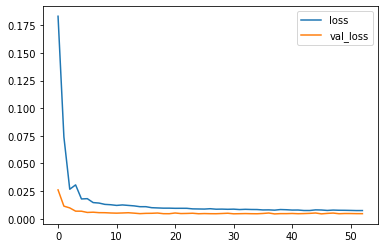

In [ ]:
model_plot(history)

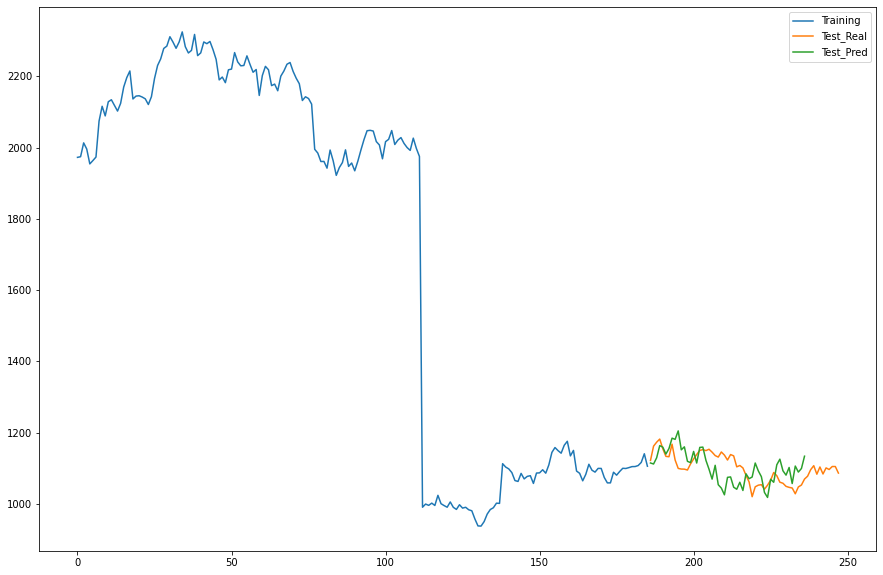

In [ ]:
plot_prediction(model, train, X_test, test)

# Deep Networks
# SimpleRNN


In [ ]:
inputs = tf.keras.Input(shape=(10,12))
x = tf.keras.layers.SimpleRNN(128, return_sequences=True)(inputs)
x = tf.keras.layers.SimpleRNN(128)(x)
outputs = tf.keras.layers.Dense(12,activation = 'linear')(x)

stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15)

model = tf.keras.Model(inputs, outputs)
print(model.summary())
model.compile(optimizer='adam', loss='mse', metrics=['mape','mae',tf.keras.metrics.RootMeanSquaredError()])
history = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=100, callbacks=[stopping])

models_dict['Deep_SimpleRNN'] = model
history_dict['Deep_SimpleRNN'] = history

Model: "model_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_35 (InputLayer)        [(None, 10, 12)]          0         
_________________________________________________________________
simple_rnn_11 (SimpleRNN)    (None, 10, 128)           18048     
_________________________________________________________________
simple_rnn_12 (SimpleRNN)    (None, 128)               32896     
_________________________________________________________________
dense_34 (Dense)             (None, 12)                1548      
Total params: 52,492
Trainable params: 52,492
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
6/6 [==============================] - 1s 72ms/step - loss: 0.3974 - mape: 1480289.0869 - mae: 0.4746 - root_mean_squared_error: 0.6175 - val_loss: 0.0680 - val_mape: 2703643.5000 - val_mae: 0.2192 - val_root_mean_squared_error: 0.2607

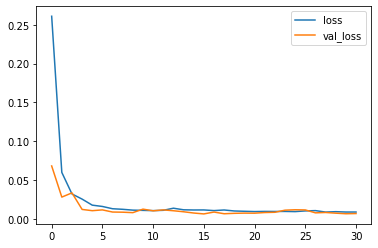

In [ ]:
model_plot(history)

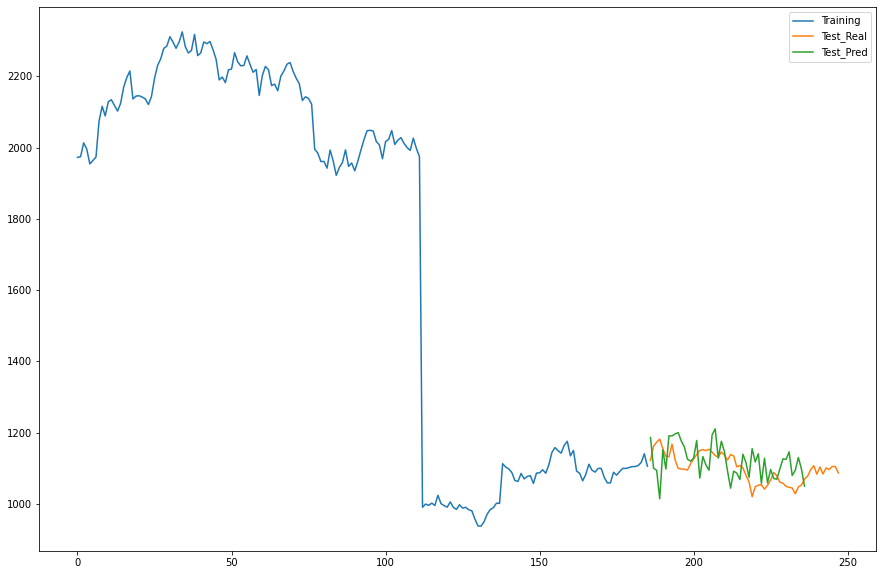

In [ ]:
plot_prediction(model, train, X_test, test)

# DropOut with Deep SimpleRNN

In [ ]:
inputs = tf.keras.Input(shape=(10,12))
x = tf.keras.layers.SimpleRNN(128, return_sequences=True)(inputs)
x = tf.keras.layers.Dropout(0.3)(x)
x = tf.keras.layers.SimpleRNN(128)(x)
x = tf.keras.layers.Dropout(0.3)(x)
outputs = tf.keras.layers.Dense(12,activation = 'linear')(x)

stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15)

model = tf.keras.Model(inputs, outputs)
print(model.summary())
model.compile(optimizer='adam', loss='mse', metrics=['mape','mae',tf.keras.metrics.RootMeanSquaredError()])
history = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=100, callbacks=[stopping])

models_dict['Deep_SimpleRNN_Drop'] = model
history_dict['Deep_SimpleRNN_Drop'] = history

Model: "model_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_36 (InputLayer)        [(None, 10, 12)]          0         
_________________________________________________________________
simple_rnn_13 (SimpleRNN)    (None, 10, 128)           18048     
_________________________________________________________________
dropout_16 (Dropout)         (None, 10, 128)           0         
_________________________________________________________________
simple_rnn_14 (SimpleRNN)    (None, 128)               32896     
_________________________________________________________________
dropout_17 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 12)                1548      
Total params: 52,492
Trainable params: 52,492
Non-trainable params: 0
______________________________________________________

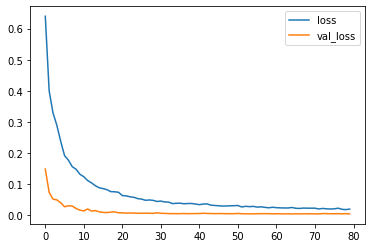

In [ ]:
model_plot(history)

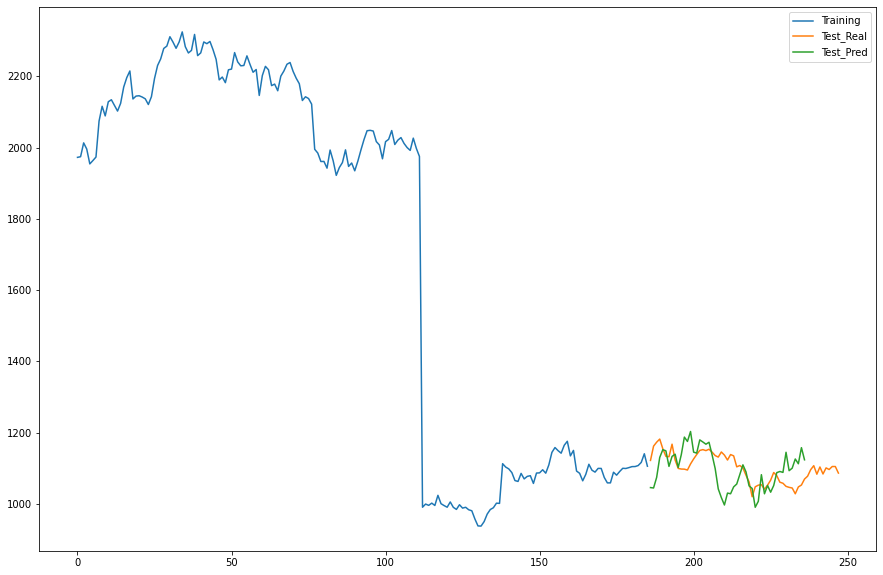

In [ ]:
plot_prediction(model, train, X_test, test)

# Deep LSTM

In [ ]:
inputs = tf.keras.Input(shape=(10,12))
x = tf.keras.layers.LSTM(128, return_sequences=True)(inputs)
x = tf.keras.layers.LSTM(128)(x)
outputs = tf.keras.layers.Dense(12,activation = 'linear')(x)

stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15)

model = tf.keras.Model(inputs, outputs)
print(model.summary())
model.compile(optimizer='adam', loss='mse', metrics=['mape','mae',tf.keras.metrics.RootMeanSquaredError()])
history = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=100, callbacks=[stopping])

models_dict['Deep_LSTM'] = model
history_dict['Deep_LSTM'] = history

Model: "model_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_37 (InputLayer)        [(None, 10, 12)]          0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 10, 128)           72192     
_________________________________________________________________
lstm_12 (LSTM)               (None, 128)               131584    
_________________________________________________________________
dense_36 (Dense)             (None, 12)                1548      
Total params: 205,324
Trainable params: 205,324
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
6/6 [==============================] - 3s 137ms/step - loss: 0.2333 - mape: 214835.4621 - mae: 0.3573 - root_mean_squared_error: 0.4763 - val_loss: 0.0242 - val_mape: 716691.0000 - val_mae: 0.1350 - val_root_mean_squared_error: 0.155

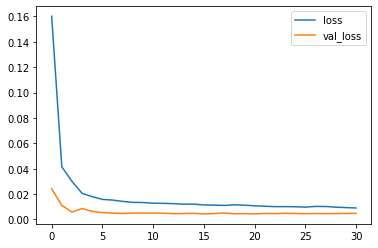

In [ ]:
model_plot(history)

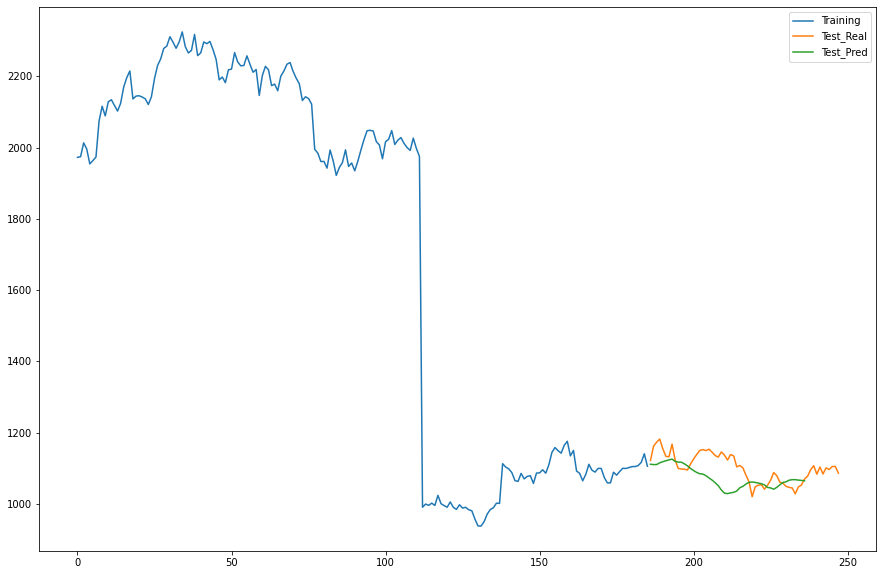

In [ ]:
plot_prediction(model, train, X_test, test)

# Deep LSTM with DropOut

In [ ]:
inputs = tf.keras.Input(shape=(10,12))
x = tf.keras.layers.LSTM(128, return_sequences=True)(inputs)
x = tf.keras.layers.Dropout(0.3)(x)
x = tf.keras.layers.LSTM(128)(x)
x = tf.keras.layers.Dropout(0.3)(x)
outputs = tf.keras.layers.Dense(12,activation = 'linear')(x)

stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15)

model = tf.keras.Model(inputs, outputs)
print(model.summary())
model.compile(optimizer='adam', loss='mse', metrics=['mape','mae',tf.keras.metrics.RootMeanSquaredError()])
history = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=100, callbacks=[stopping])

models_dict['Deep_LSTM_Drop'] = model
history_dict['Deep_LSTM_Drop'] = history

Model: "model_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_38 (InputLayer)        [(None, 10, 12)]          0         
_________________________________________________________________
lstm_13 (LSTM)               (None, 10, 128)           72192     
_________________________________________________________________
dropout_18 (Dropout)         (None, 10, 128)           0         
_________________________________________________________________
lstm_14 (LSTM)               (None, 128)               131584    
_________________________________________________________________
dropout_19 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_37 (Dense)             (None, 12)                1548      
Total params: 205,324
Trainable params: 205,324
Non-trainable params: 0
____________________________________________________

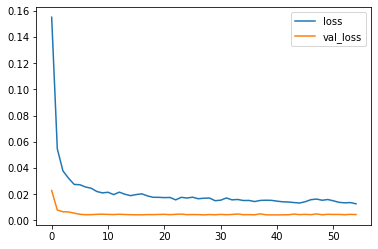

In [ ]:
model_plot(history)

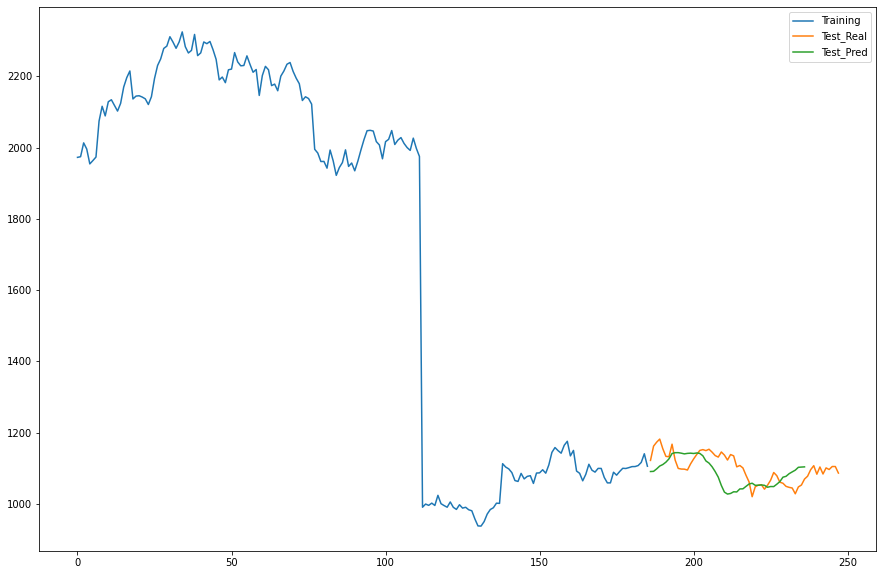

In [ ]:
plot_prediction(model, train, X_test, test)

# Deep GRU

In [ ]:
inputs = tf.keras.Input(shape=(10,12))
x = tf.keras.layers.GRU(128, return_sequences=True)(inputs)
x = tf.keras.layers.GRU(128)(x)
outputs = tf.keras.layers.Dense(12,activation = 'linear')(x)

stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15)

model = tf.keras.Model(inputs, outputs)
print(model.summary())
model.compile(optimizer='adam', loss='mse', metrics=['mape','mae',tf.keras.metrics.RootMeanSquaredError()])
history = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=100, callbacks=[stopping])

models_dict['Deep_GRU'] = model
history_dict['Deep_GRU'] = history

Model: "model_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_39 (InputLayer)        [(None, 10, 12)]          0         
_________________________________________________________________
gru_23 (GRU)                 (None, 10, 128)           54528     
_________________________________________________________________
gru_24 (GRU)                 (None, 128)               99072     
_________________________________________________________________
dense_38 (Dense)             (None, 12)                1548      
Total params: 155,148
Trainable params: 155,148
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
6/6 [==============================] - 3s 117ms/step - loss: 0.2502 - mape: 128614.2252 - mae: 0.3784 - root_mean_squared_error: 0.4949 - val_loss: 0.0225 - val_mape: 730654.2500 - val_mae: 0.1267 - val_root_mean_squared_error: 0.150

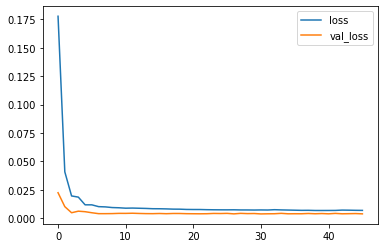

In [ ]:
model_plot(history)

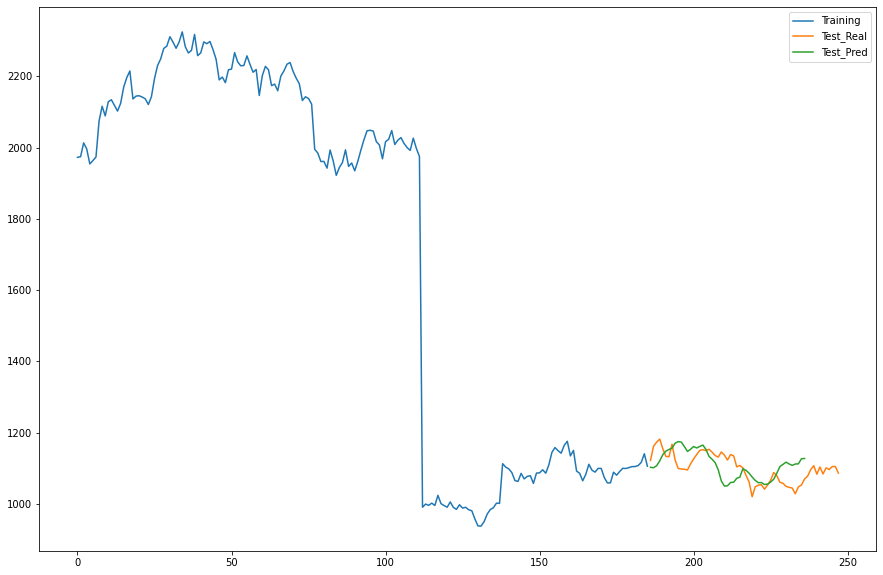

In [ ]:
plot_prediction(model, train, X_test, test)

# Deep GRU with DropOut

In [ ]:
inputs = tf.keras.Input(shape=(10,12))
x = tf.keras.layers.GRU(128, return_sequences=True)(inputs)
x = tf.keras.layers.Dropout(0.3)(x)
x = tf.keras.layers.GRU(128)(x)
x = tf.keras.layers.Dropout(0.3)(x)
outputs = tf.keras.layers.Dense(12,activation = 'linear')(x)

stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15)

model = tf.keras.Model(inputs, outputs)
print(model.summary())
model.compile(optimizer='adam', loss='mse', metrics=['mape','mae',tf.keras.metrics.RootMeanSquaredError()])
history = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=100, callbacks=[stopping])

models_dict['Deep_GRU_Drop'] = model
history_dict['Deep_GRU_Drop'] = history

Model: "model_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_40 (InputLayer)        [(None, 10, 12)]          0         
_________________________________________________________________
gru_25 (GRU)                 (None, 10, 128)           54528     
_________________________________________________________________
dropout_20 (Dropout)         (None, 10, 128)           0         
_________________________________________________________________
gru_26 (GRU)                 (None, 128)               99072     
_________________________________________________________________
dropout_21 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_39 (Dense)             (None, 12)                1548      
Total params: 155,148
Trainable params: 155,148
Non-trainable params: 0
____________________________________________________

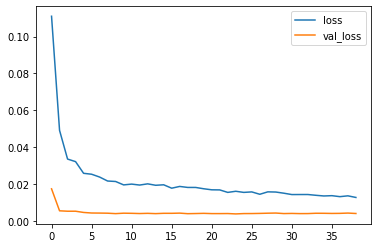

In [ ]:
model_plot(history)

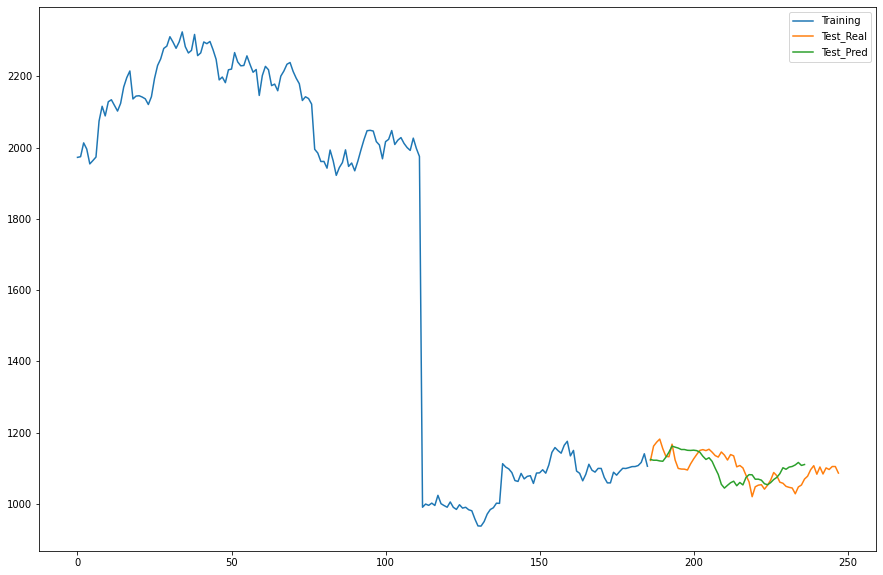

In [ ]:
plot_prediction(model, train, X_test, test)

# Deep Convolutional Network

In [ ]:
inputs = tf.keras.Input(shape=(10,12))
x = tf.keras.layers.Conv1D(128, 2)(inputs)
x = tf.keras.layers.MaxPool1D(2)(x)
x = tf.keras.layers.Conv1D(256, 1)(x)
x = tf.keras.layers.AveragePooling1D(2)(x)
x = tf.keras.layers.Flatten()(x)
outputs = tf.keras.layers.Dense(12,activation = 'linear')(x)

stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15)

model = tf.keras.Model(inputs, outputs)
print(model.summary())
model.compile(optimizer='adam', loss='mse', metrics=['mape','mae',tf.keras.metrics.RootMeanSquaredError()])
history = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=100, callbacks=[stopping])

models_dict['Deep_Convolution'] = model
history_dict['Deep_Convolution'] = history

Model: "model_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_41 (InputLayer)        [(None, 10, 12)]          0         
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 9, 128)            3200      
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 4, 128)            0         
_________________________________________________________________
conv1d_12 (Conv1D)           (None, 4, 256)            33024     
_________________________________________________________________
average_pooling1d_4 (Average (None, 2, 256)            0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_40 (Dense)             (None, 12)                615

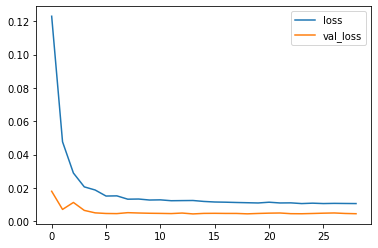

In [ ]:
model_plot(history)

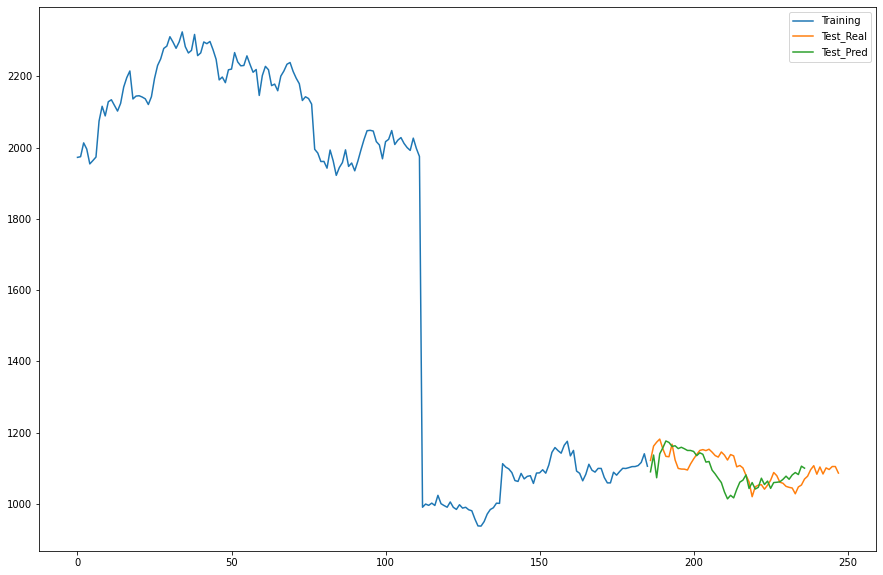

In [ ]:
plot_prediction(model, train, X_test, test)

# Deep Convolutional Network with DropOut

In [ ]:
inputs = tf.keras.Input(shape=(10,12))
x = tf.keras.layers.Conv1D(128, 2)(inputs)
x = tf.keras.layers.MaxPool1D(2)(x)
x = tf.keras.layers.Dropout(0.3)(x)
x = tf.keras.layers.Conv1D(256, 1)(x)
x = tf.keras.layers.AveragePooling1D(2)(x)
x = tf.keras.layers.Dropout(0.3)(x)
x = tf.keras.layers.Flatten()(x)
outputs = tf.keras.layers.Dense(12,activation = 'linear')(x)

stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15)

model = tf.keras.Model(inputs, outputs)
print(model.summary())
model.compile(optimizer='adam', loss='mse', metrics=['mape','mae',tf.keras.metrics.RootMeanSquaredError()])
history = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=100, callbacks=[stopping])

models_dict['Deep_Convolution_Drop'] = model
history_dict['Deep_Convolution_Drop'] = history

Model: "model_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_42 (InputLayer)        [(None, 10, 12)]          0         
_________________________________________________________________
conv1d_13 (Conv1D)           (None, 9, 128)            3200      
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 4, 128)            0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 4, 128)            0         
_________________________________________________________________
conv1d_14 (Conv1D)           (None, 4, 256)            33024     
_________________________________________________________________
average_pooling1d_5 (Average (None, 2, 256)            0         
_________________________________________________________________
dropout_23 (Dropout)         (None, 2, 256)            0  

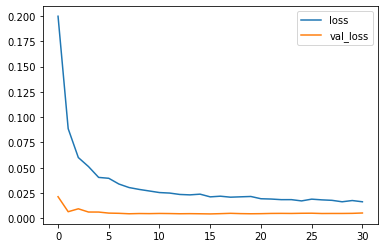

In [ ]:
model_plot(history)

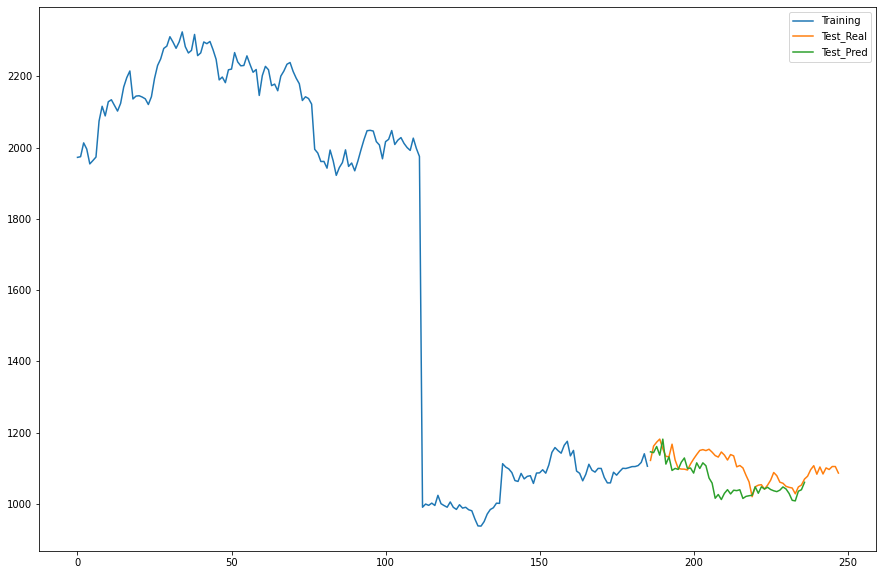

In [ ]:
plot_prediction(model, train, X_test, test)

# Evaluation

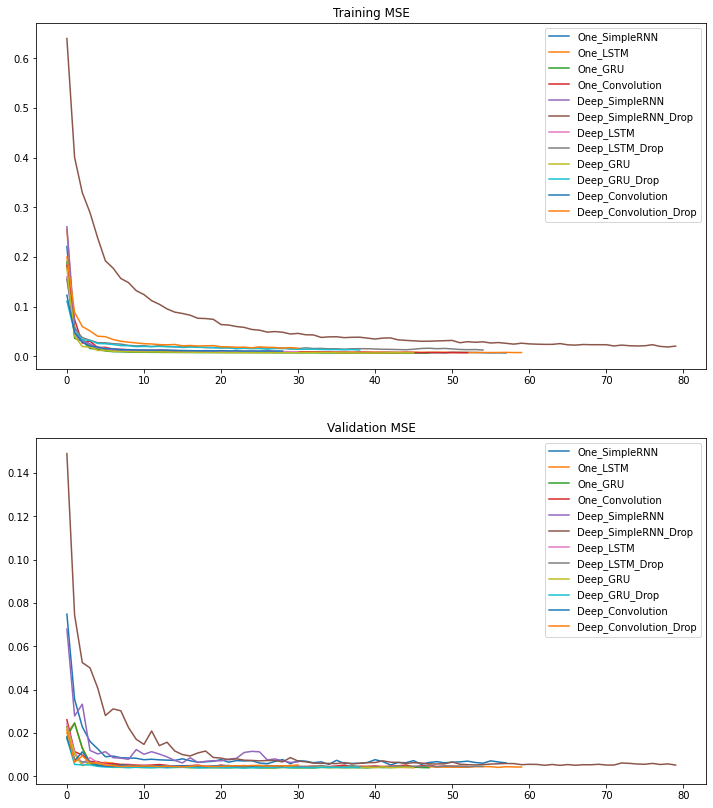

In [ ]:
fig ,axes = plt.subplots(2, 1, figsize=(12, 14))

for name, his in history_dict.items():
  axes[0].plot(his.history['loss'], label=name)
  axes[0].set_title('Training MSE')
  axes[0].legend()
  axes[1].plot(his.history['val_loss'], label=name)
  axes[1].set_title('Validation MSE')
  axes[1].legend()

plt.show()

2/2 [==============================] - 0s 6ms/step - loss: 0.0052 - mape: 1075379.5000 - mae: 0.0488 - root_mean_squared_error: 0.0721


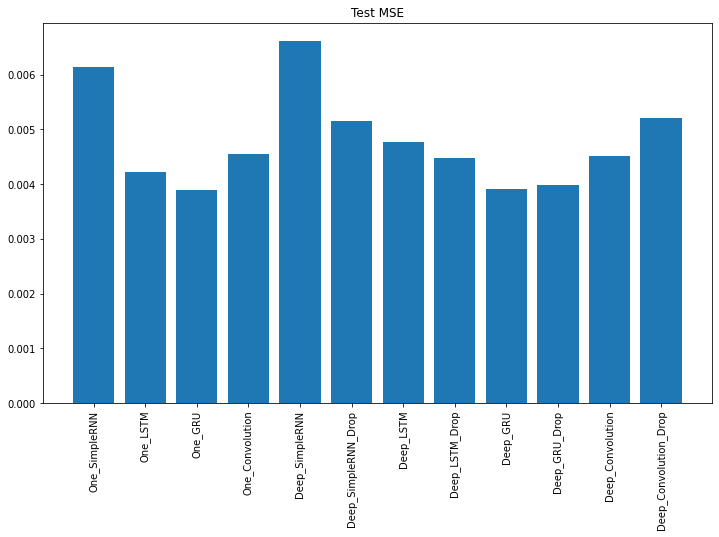

In [ ]:
scores = {name: model.evaluate(X_test, y_test)[0] for name, model in models_dict.items()}

plt.figure(figsize=(12, 7))
plt.bar(range(len(scores)), list(scores.values()), align='center')
plt.xticks(range(len(scores)), list(scores.keys()), rotation='vertical')
plt.title("Test MSE")
plt.show()

# Deep_GRU (Best Model)
# Change number of units and time_step

In [ ]:
time_step = 15
X_train, y_train = create_dataset(train, time_step)
X_test, y_test = create_dataset(test, time_step)

In [ ]:
inputs = tf.keras.Input(shape=(15,12))
x = tf.keras.layers.GRU(256, return_sequences=True)(inputs)
x = tf.keras.layers.GRU(256)(x)
outputs = tf.keras.layers.Dense(12,activation = 'linear')(x)

stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15)

model = tf.keras.Model(inputs, outputs)
print(model.summary())
model.compile(optimizer='adam', loss='mse', metrics=['mape','mae',tf.keras.metrics.RootMeanSquaredError()])
history = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=100, callbacks=[stopping])

models_dict['Deep_GRU'] = model
history_dict['Deep_GRU'] = history

Model: "model_42"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_43 (InputLayer)        [(None, 15, 12)]          0         
_________________________________________________________________
gru_27 (GRU)                 (None, 15, 256)           207360    
_________________________________________________________________
gru_28 (GRU)                 (None, 256)               394752    
_________________________________________________________________
dense_42 (Dense)             (None, 12)                3084      
Total params: 605,196
Trainable params: 605,196
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
6/6 [==============================] - 3s 118ms/step - loss: 0.1702 - mape: 188817.6685 - mae: 0.2971 - root_mean_squared_error: 0.4056 - val_loss: 0.0104 - val_mape: 857379.6250 - val_mae: 0.0693 - val_root_mean_squared_error: 0.102

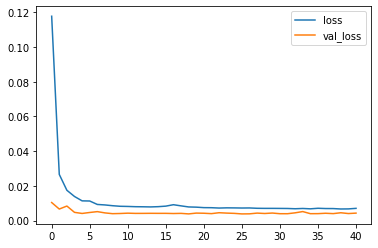

In [ ]:
model_plot(history)

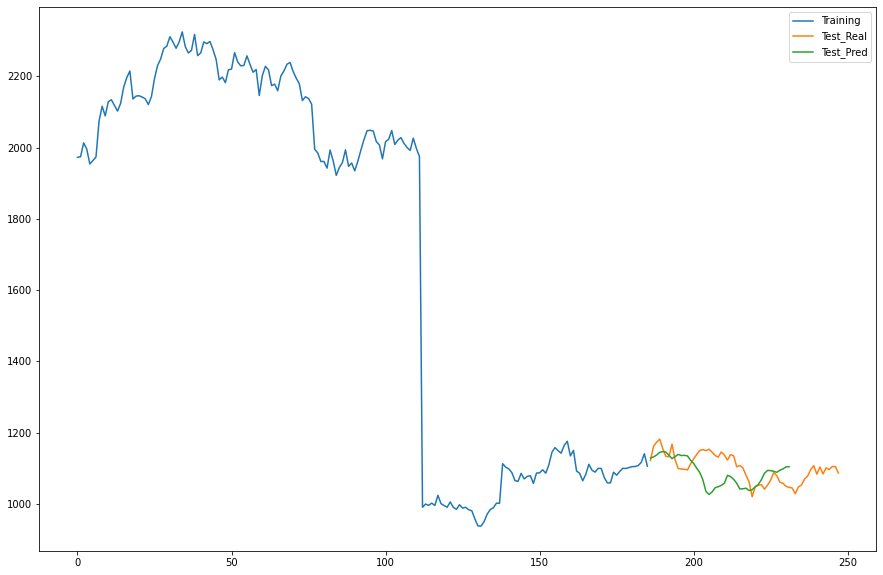

In [ ]:
plot_prediction(model, train, X_test, test)

In [ ]:
time_step = 3
X_train, y_train = create_dataset(train, time_step)
X_test, y_test = create_dataset(test, time_step)

In [ ]:
inputs = tf.keras.Input(shape=(3,12))
x = tf.keras.layers.GRU(256, return_sequences=True)(inputs)
x = tf.keras.layers.GRU(256)(x)
outputs = tf.keras.layers.Dense(12,activation = 'linear')(x)

stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15)

model = tf.keras.Model(inputs, outputs)
print(model.summary())
model.compile(optimizer='adam', loss='mse', metrics=['mape','mae',tf.keras.metrics.RootMeanSquaredError()])
history = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=100, callbacks=[stopping])

models_dict['Deep_GRU'] = model
history_dict['Deep_GRU'] = history

Model: "model_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_44 (InputLayer)        [(None, 3, 12)]           0         
_________________________________________________________________
gru_29 (GRU)                 (None, 3, 256)            207360    
_________________________________________________________________
gru_30 (GRU)                 (None, 256)               394752    
_________________________________________________________________
dense_43 (Dense)             (None, 12)                3084      
Total params: 605,196
Trainable params: 605,196
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
6/6 [==============================] - 3s 118ms/step - loss: 0.2303 - mape: 232712.9431 - mae: 0.3529 - root_mean_squared_error: 0.4706 - val_loss: 0.0294 - val_mape: 673863.0625 - val_mae: 0.1475 - val_root_mean_squared_error: 0.171

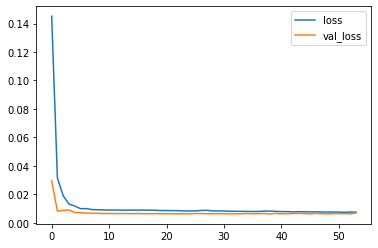

In [ ]:
model_plot(history)

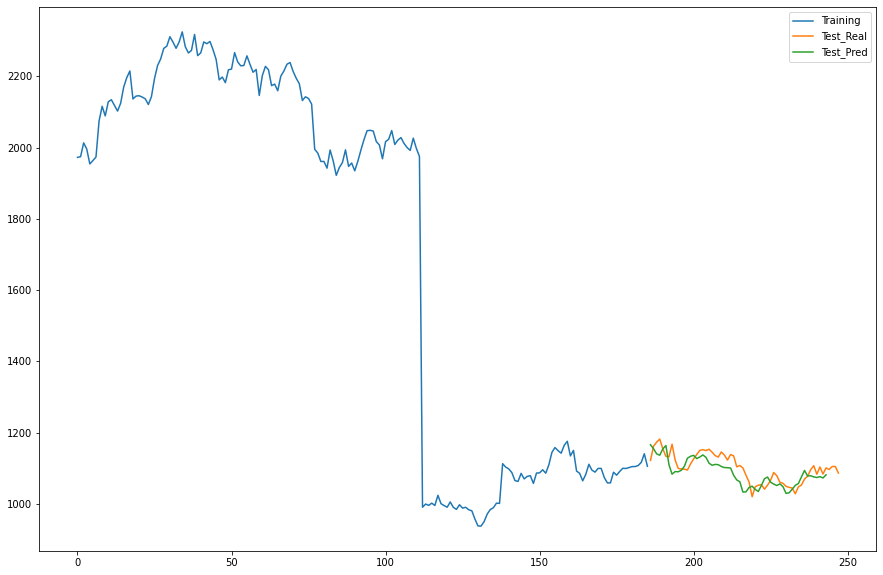

In [ ]:
plot_prediction(model, train, X_test, test)

#Long Term prediction

In [ ]:
time_step = 10
X_train, y_train = create_dataset(train, time_step)
X_test, y_test = create_dataset(test, time_step)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(175, 10, 12)
(175, 12)
(51, 10, 12)
(51, 12)


In [ ]:
time_step = 10

dataX, dataY = [],[]
for i in range(len(train)-time_step-1):
  a = train[i:(i+time_step),:]
  dataX.append(a)
  dataY.append(train[i:i+time_step,0])
dataX = np.array(dataX)
dataY = np.array(dataY)
print(dataX.shape)
print(dataY.shape)

X_train, y_train = dataX, dataY

dataX, dataY = [],[]
for i in range(len(test)-time_step-1):
  a = test[i:(i+time_step),:]
  dataX.append(a)
  dataY.append(test[i:i+time_step,0])
dataX = np.array(dataX)
dataY = np.array(dataY)

X_test, y_test = dataX, dataY
print(dataX.shape)
print(dataY.shape)

(175, 10, 12)
(175, 10)
(51, 10, 12)
(51, 10)


In [ ]:
inputs = tf.keras.Input(shape=(10,12))
x = tf.keras.layers.GRU(256, return_sequences=True)(inputs)
x = tf.keras.layers.GRU(256)(x)
outputs = tf.keras.layers.Dense(10,activation = 'linear')(x)

stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15)

model = tf.keras.Model(inputs, outputs)
print(model.summary())
model.compile(optimizer='adam', loss='mse', metrics=['mape','mae',tf.keras.metrics.RootMeanSquaredError()])
history = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=100, callbacks=[stopping])

models_dict['Deep_GRU_Long'] = model
history_dict['Deep_GRU_Long'] = history

Model: "model_44"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_45 (InputLayer)        [(None, 10, 12)]          0         
_________________________________________________________________
gru_31 (GRU)                 (None, 10, 256)           207360    
_________________________________________________________________
gru_32 (GRU)                 (None, 256)               394752    
_________________________________________________________________
dense_44 (Dense)             (None, 10)                2570      
Total params: 604,682
Trainable params: 604,682
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
6/6 [==============================] - 3s 117ms/step - loss: 0.2167 - mape: 471964.1853 - mae: 0.3403 - root_mean_squared_error: 0.4547 - val_loss: 0.0055 - val_mape: 60.8828 - val_mae: 0.0625 - val_root_mean_squared_error: 0.0739
Ep

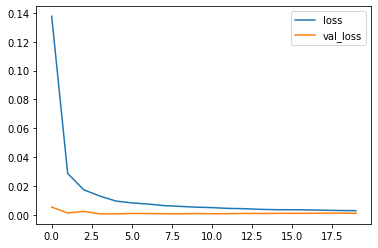

In [ ]:
model_plot(history)

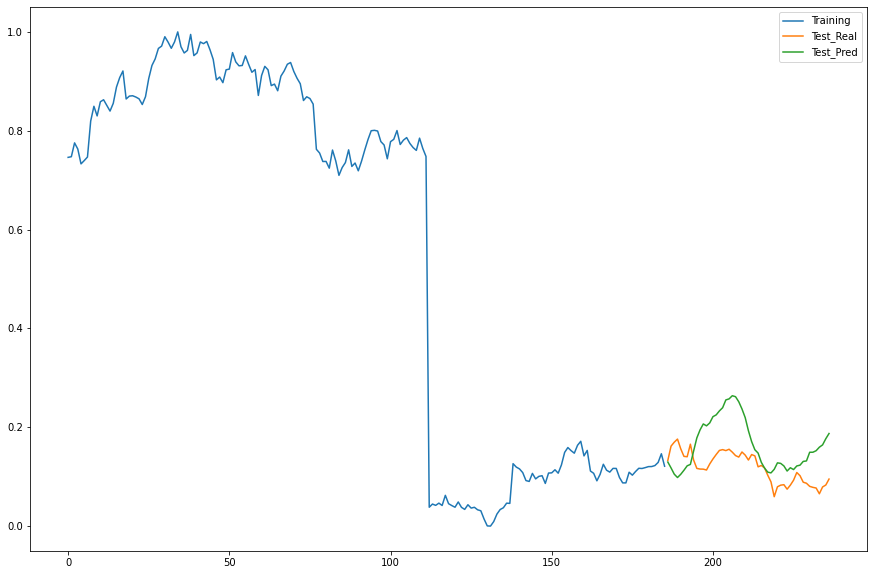

In [ ]:
prediction = model.predict(X_test)
plt.figure(figsize=(15,10))
plt.plot(np.arange(train.shape[0]), train[:,0], label='Training')
plt.plot(train.shape[0] + np.arange(y_test.shape[0]), y_test[:,0], label='Test_Real')
plt.plot(train.shape[0] + np.arange(prediction.shape[0]), prediction[:,0], label='Test_Pred')
plt.legend()
plt.show()